### This script shows how to use the existing code in opengrid to create a water consumption benchmark. 

In [1]:
import os
import sys
import inspect
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tmpo

from opengrid import config
c = config.Config()

%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8

In [2]:
try:
    if os.path.exists(c.get('tmpo', 'data')):
        path_to_tmpo_data = c.get('tmpo', 'data')
except:
    path_to_tmpo_data = None

In [3]:
from opengrid.library.houseprint import houseprint

### We create one dataframe containing a column for each water sensor

In [ ]:
#hp = houseprint.Houseprint()

In [ ]:
#hp.save('new_houseprint.pkl')

In [5]:
hp = houseprint.load_houseprint_from_file('new_houseprint.pkl')
hp.init_tmpo()

OperationalError: database is locked

In [ ]:
#hp.sync_tmpos()

In [6]:
df = hp.get_data(sensortype='water')

/mnt/data/work/opengrid/code/opengrid/opengrid/library/houseprint/sensor.py:231: FutureWarning: using '+' to provide set union with datetimelike Indexes is deprecated, use .union()
  data = data.reindex(data.index + newindex)


In [7]:
#retain only positive values (sometimes there are meter resets)
df = df[df > 0]

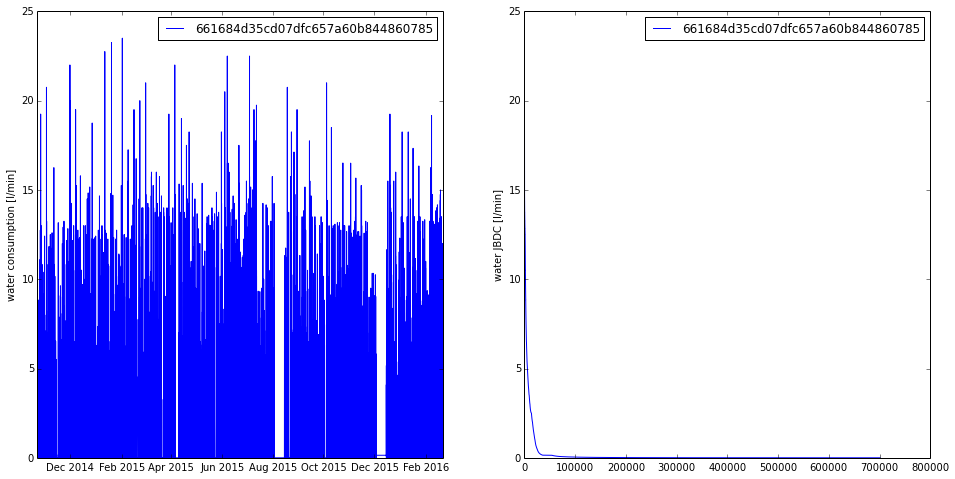

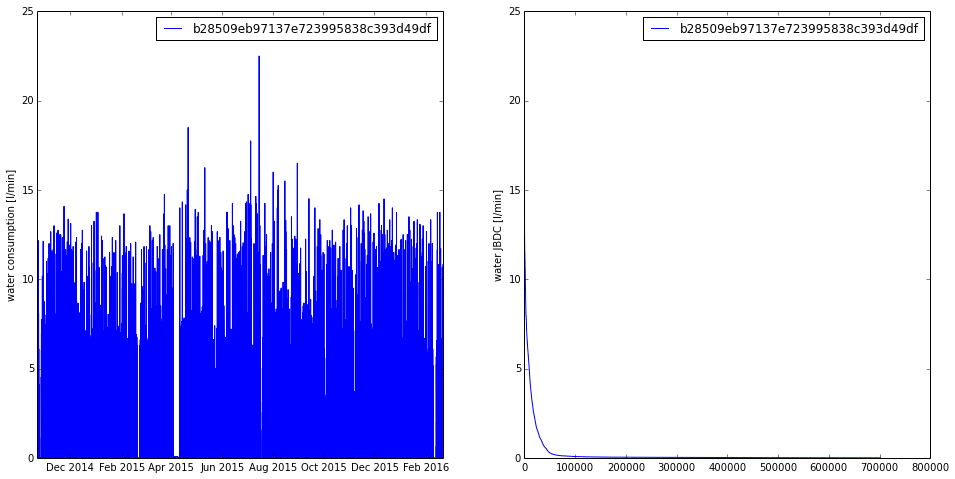

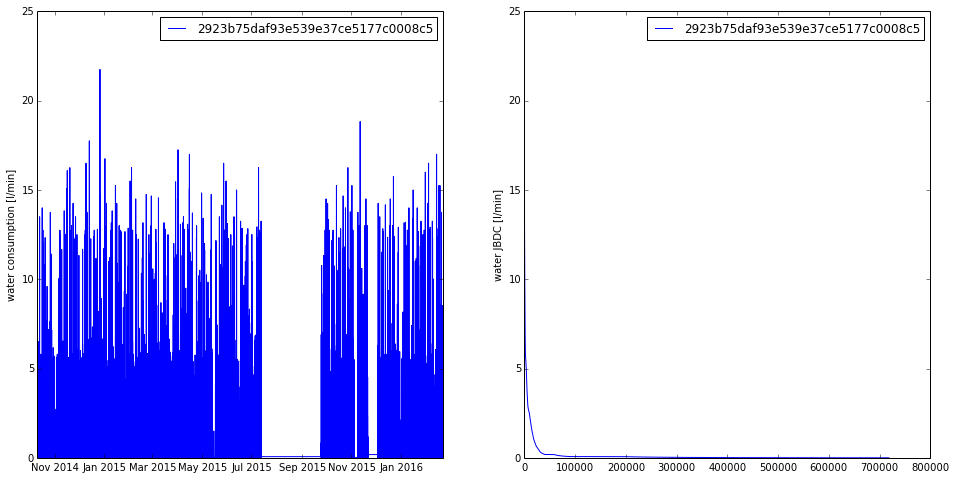

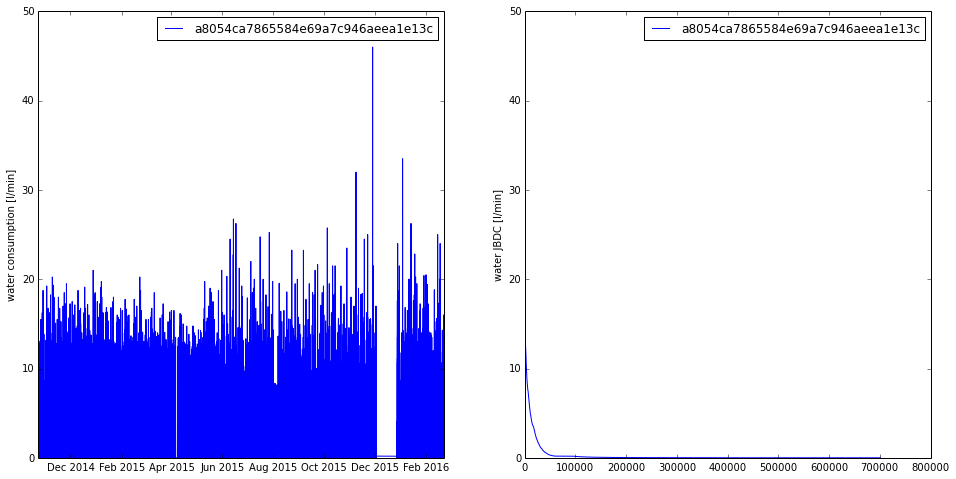

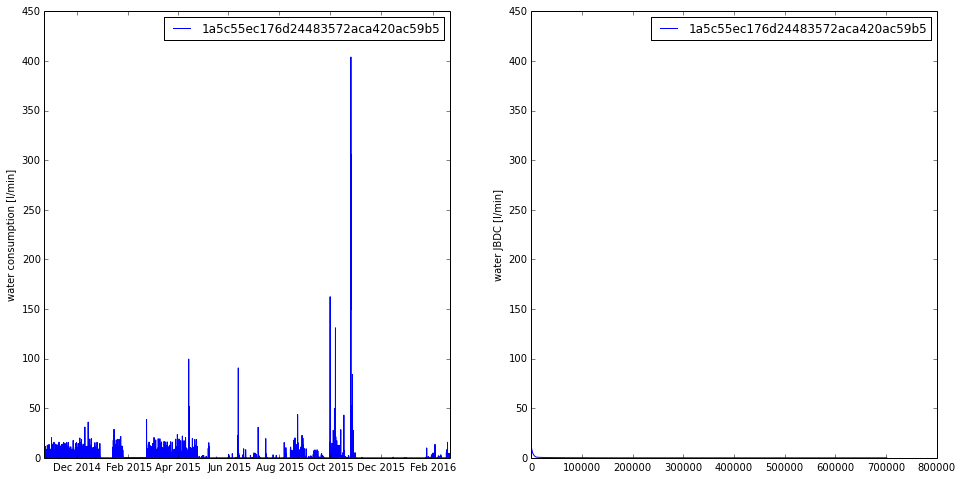

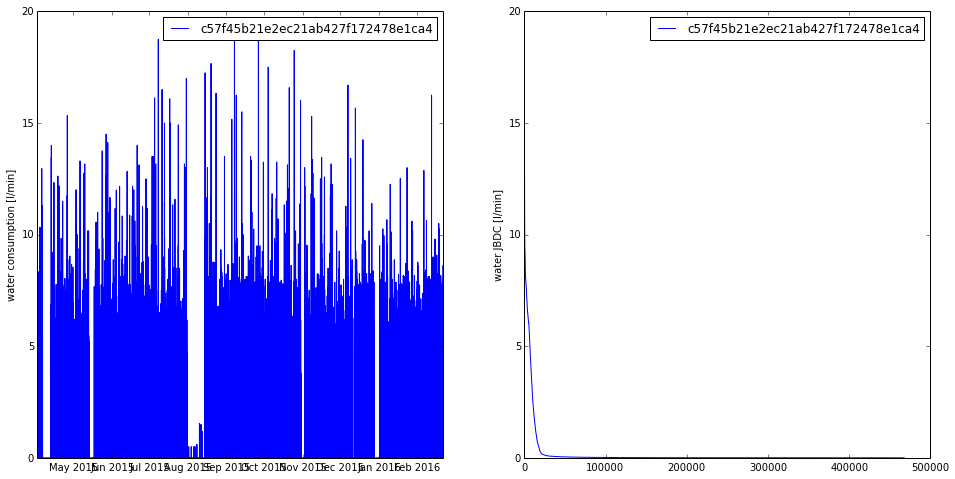

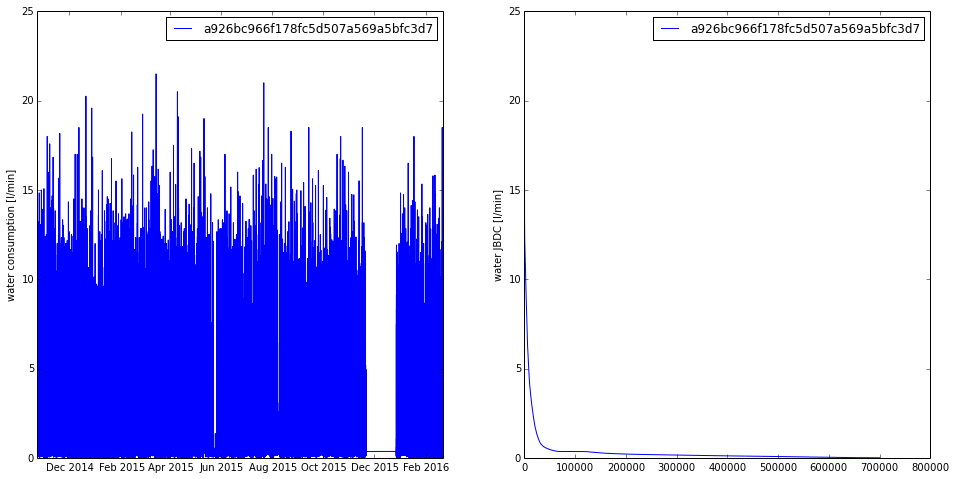

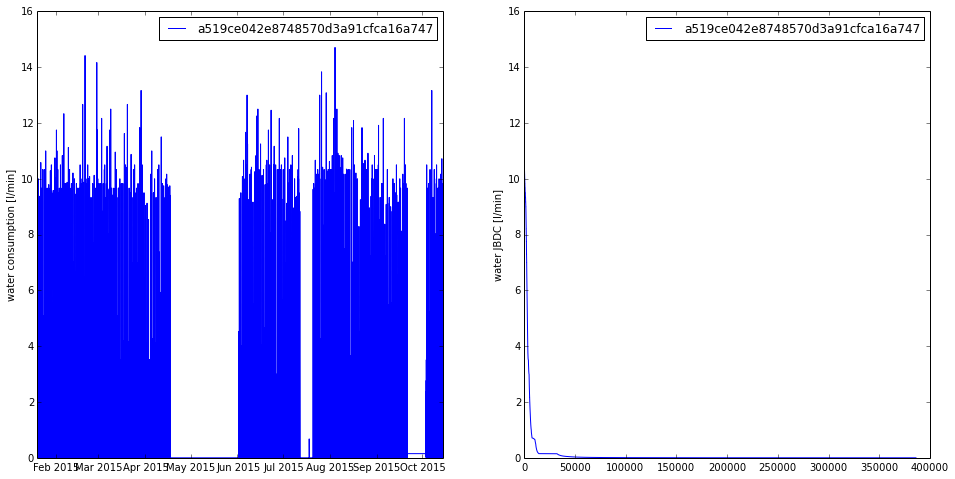

In [8]:
# plot timeseries and load duration for each retained sensor

for sensor in df.columns:
    plt.figure()
    ts = df[sensor].dropna()
    ax1=plt.subplot(121)
    plt.plot_date(ts.index, ts, '-', label=sensor)
    plt.ylabel('water consumption [l/min]')
    plt.legend()
    
    ax2=plt.subplot(122)
    plt.plot(np.sort(ts)[::-1], label=sensor)
    plt.ylabel('water JBDC [l/min]')
    plt.legend()

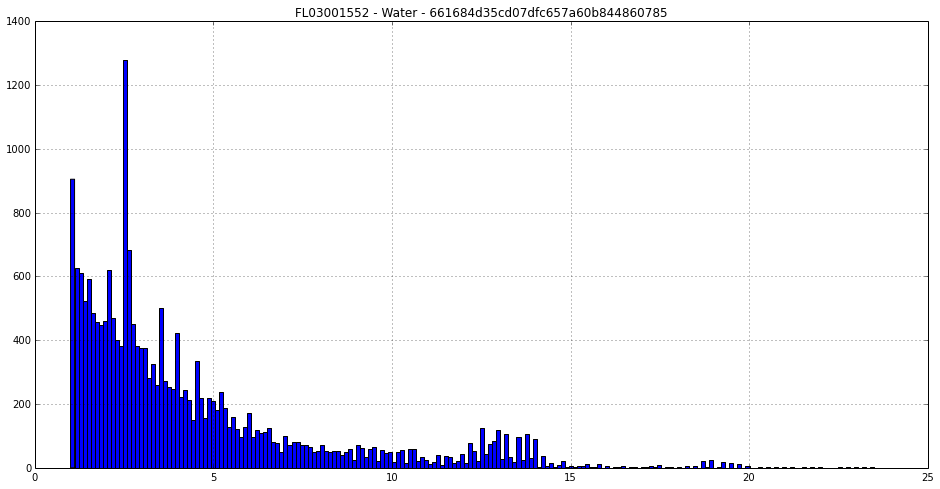

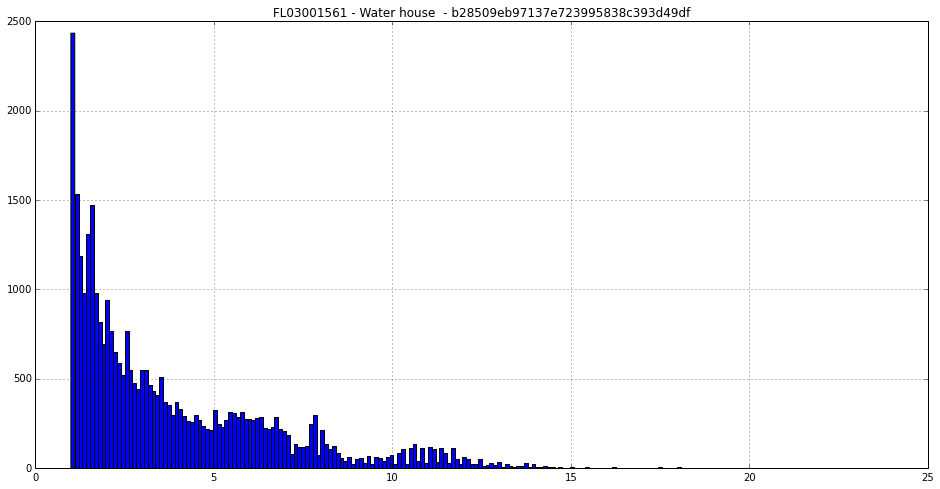

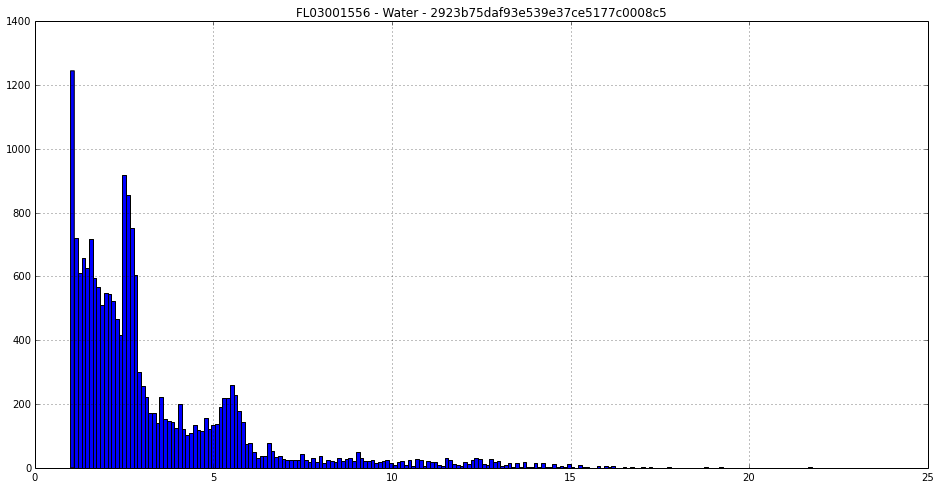

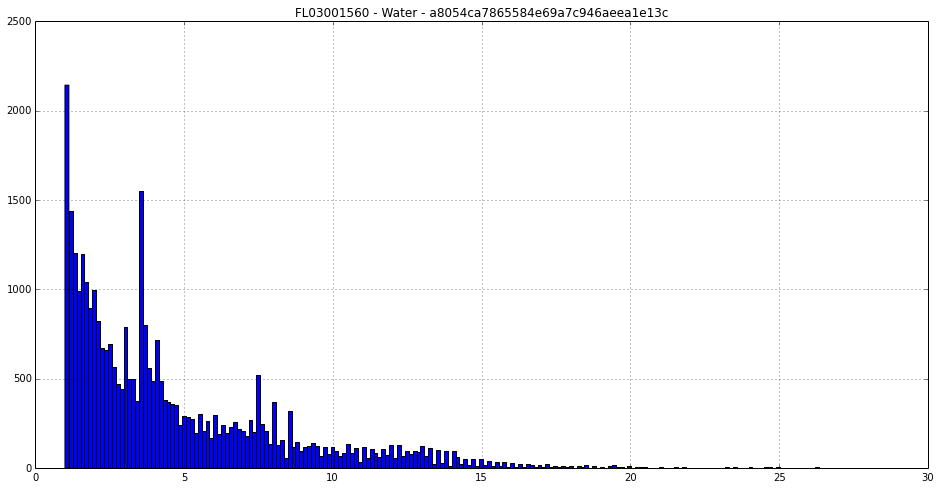

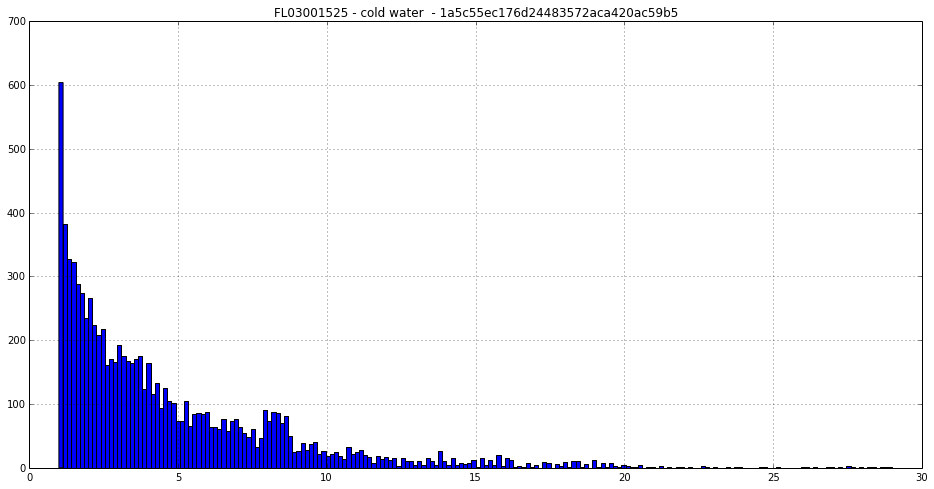

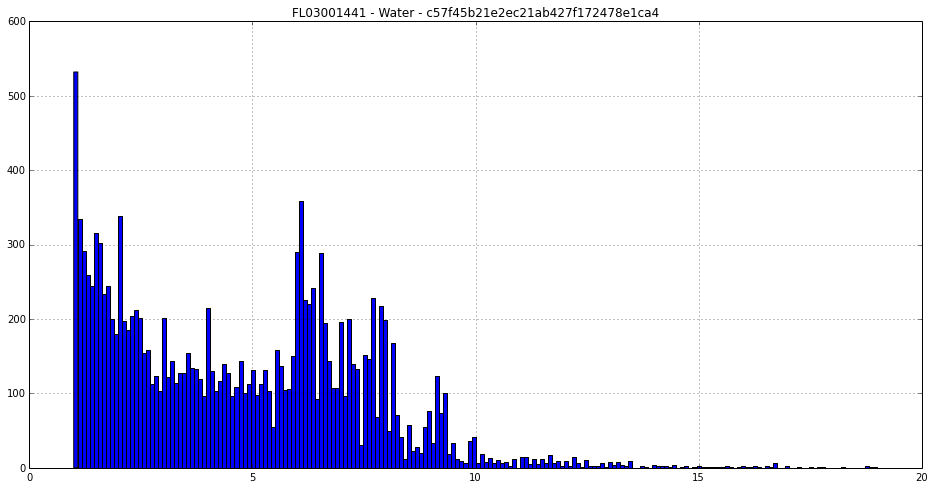

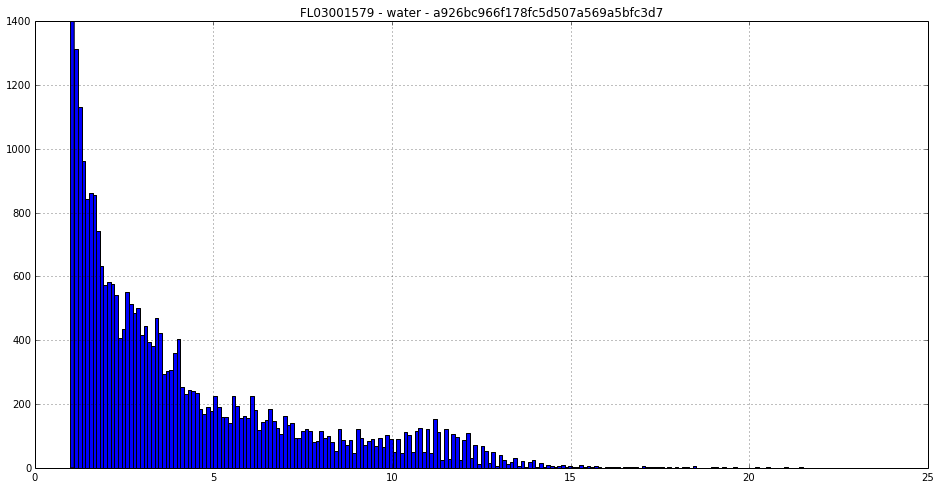

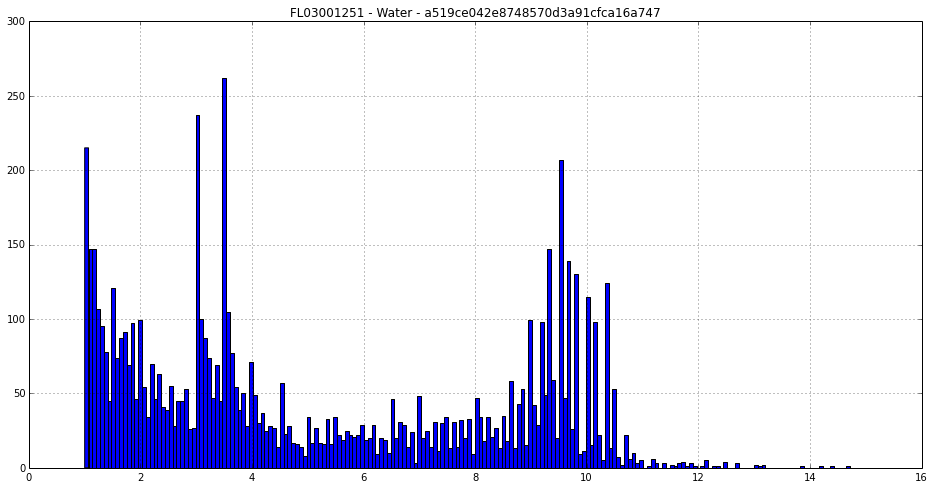

In [11]:
for sensor in df.columns:
    plt.figure()
    ts = df[sensor]
    ts=ts[ts>1]
    ts=ts[ts<30]
    ts.hist(bins=200)
    plt.title(hp.find_sensor(sensor).device.key + ' - ' + hp.find_sensor(sensor).description + ' - ' + sensor)

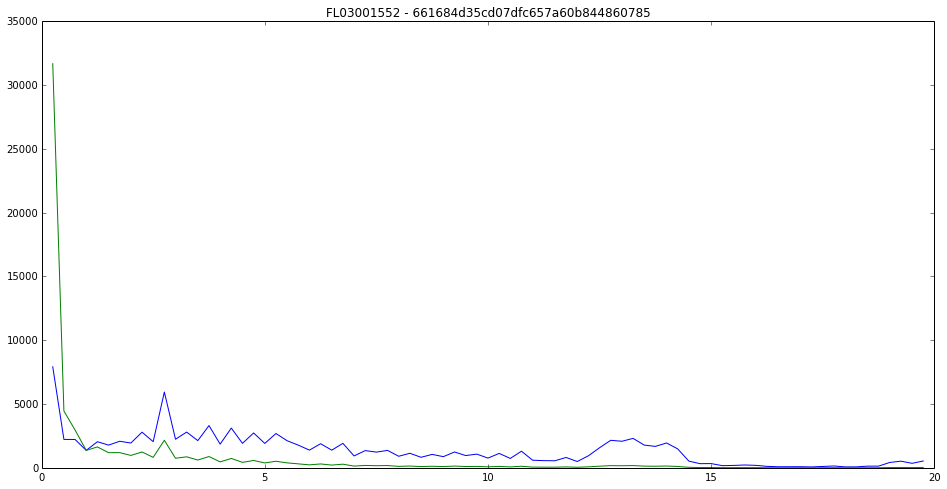

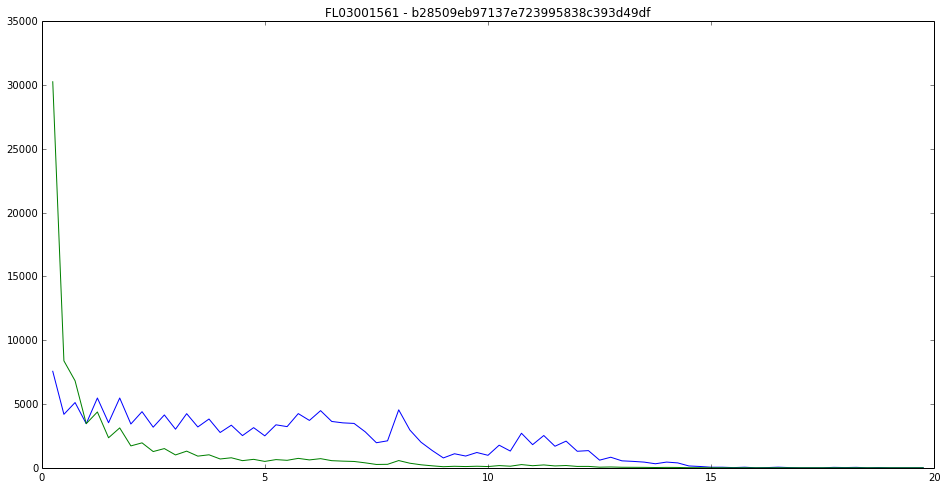

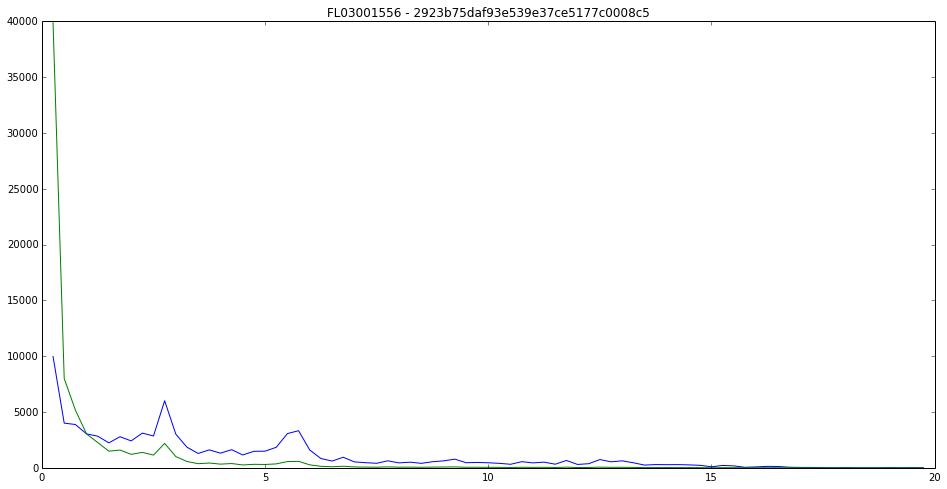

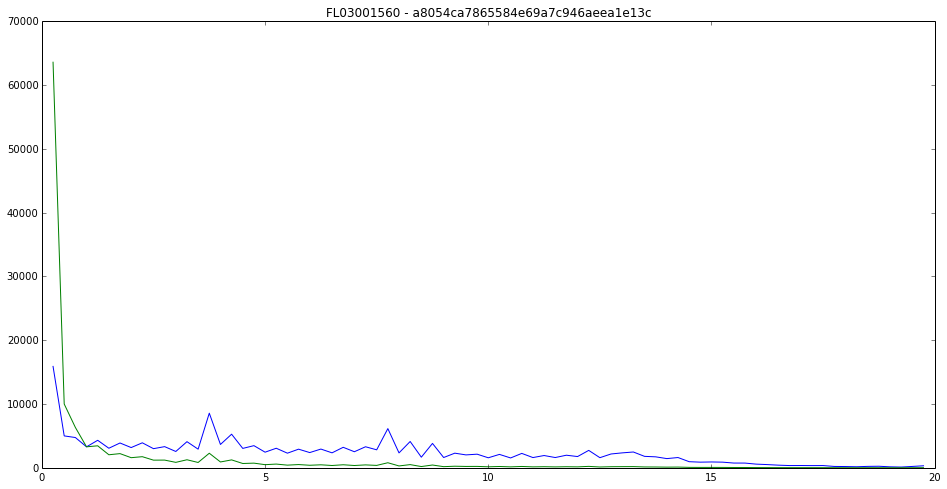

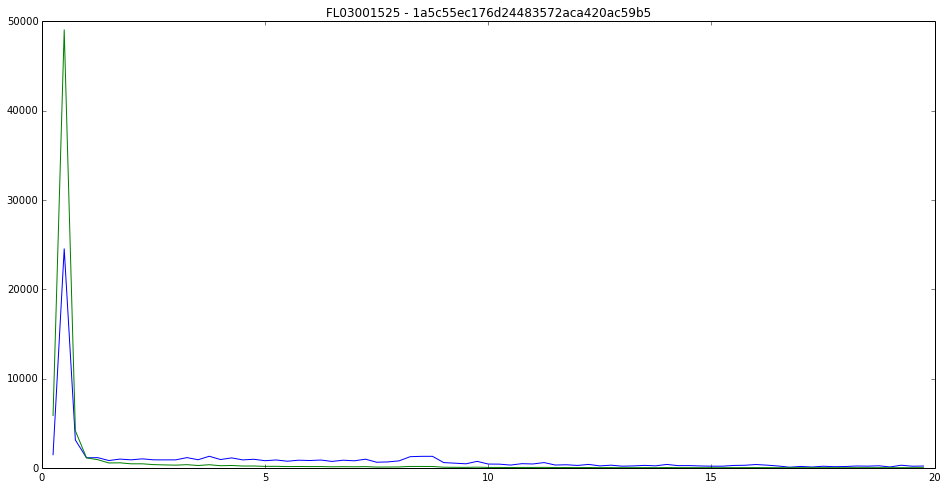

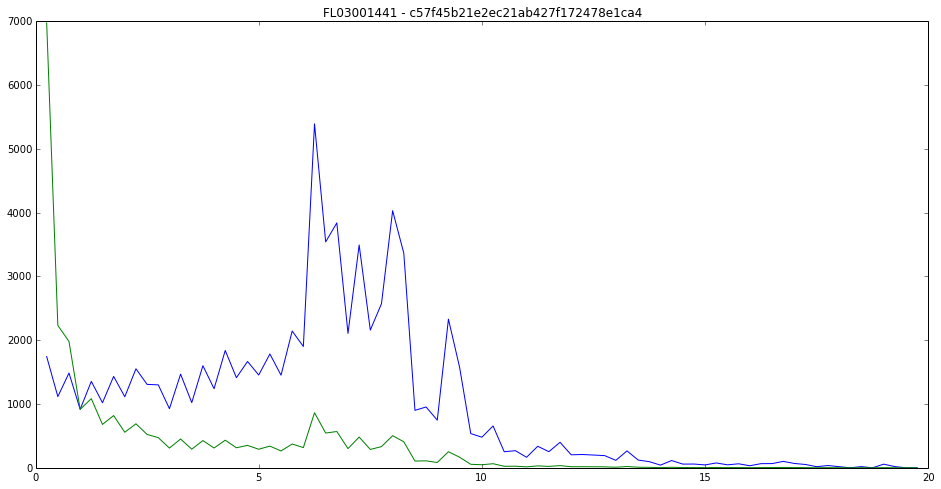

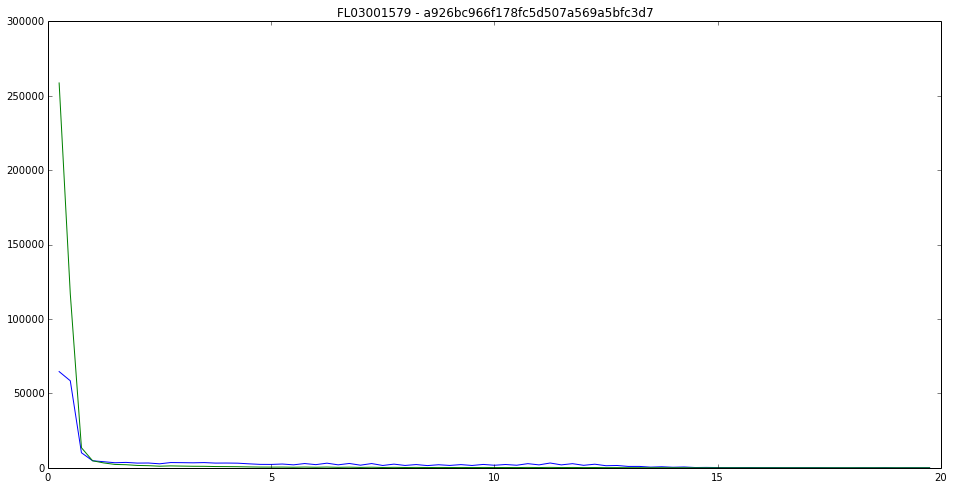

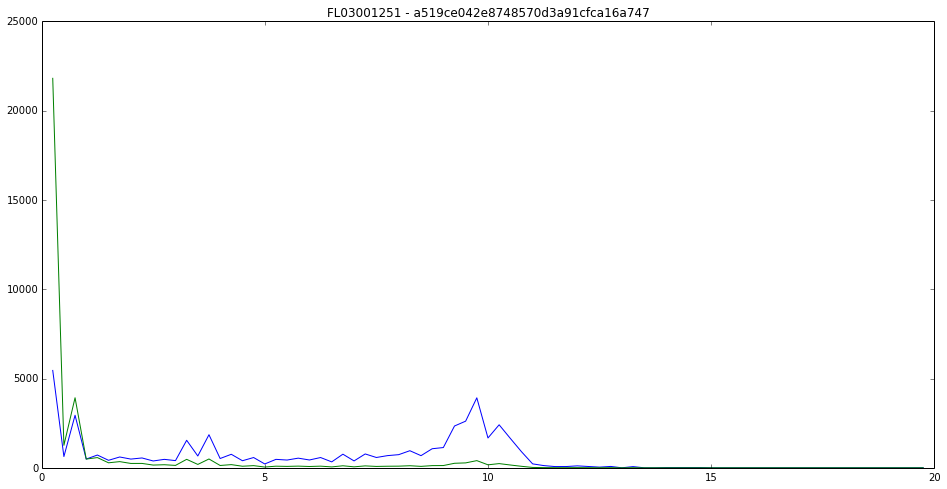

In [10]:
for sensor in df.columns:
        
    plt.figure()
    ts = df[sensor]
    ts=ts[ts>0.1]
    ts=ts[ts<30]
    
    hst, edges = np.histogram(ts, np.arange(0,20,0.25))
    hst_weighted = hst * edges[1:]
    plt.plot(np.arange(0,20,0.25)[1:], hst_weighted)
    plt.plot(np.arange(0,20,0.25)[1:], hst)
    plt.title(hp.find_sensor(sensor).device.key + ' - ' + sensor)
    

In [ ]:
delattr(hp, '_tmpos')

In [ ]:
df.tail()